In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
crop = pd.read_csv("Crop_recommendation.csv")

In [3]:
print("🔹 First 5 rows of dataset:")
display(crop.head())

🔹 First 5 rows of dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
print("\n🔹 Dataset Info:")
print(crop.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [5]:
print("\n🔹 Missing Values:")
print(crop.isnull().sum())


🔹 Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


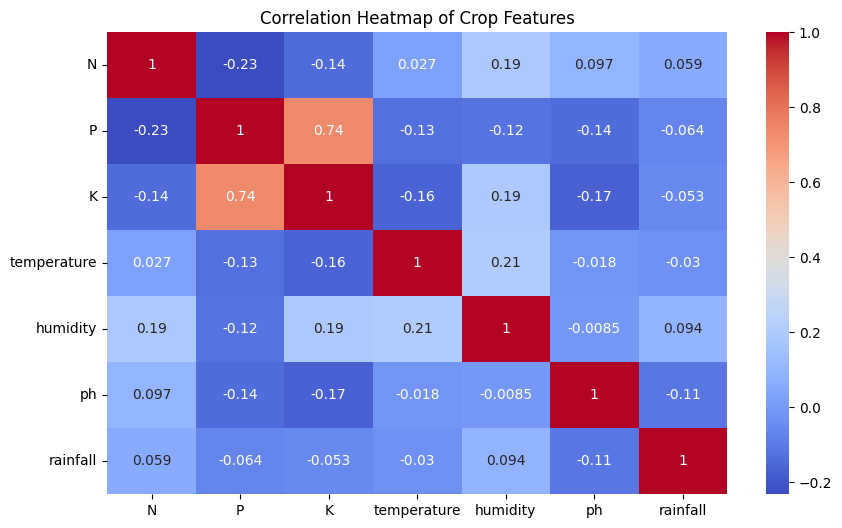

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(crop.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Crop Features")
plt.show()

In [7]:
X = crop.drop('label', axis=1)
y = crop['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
y_pred = model.predict(X_test)

In [11]:
print("\n🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Accuracy: 0.9931818181818182

🔹 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00

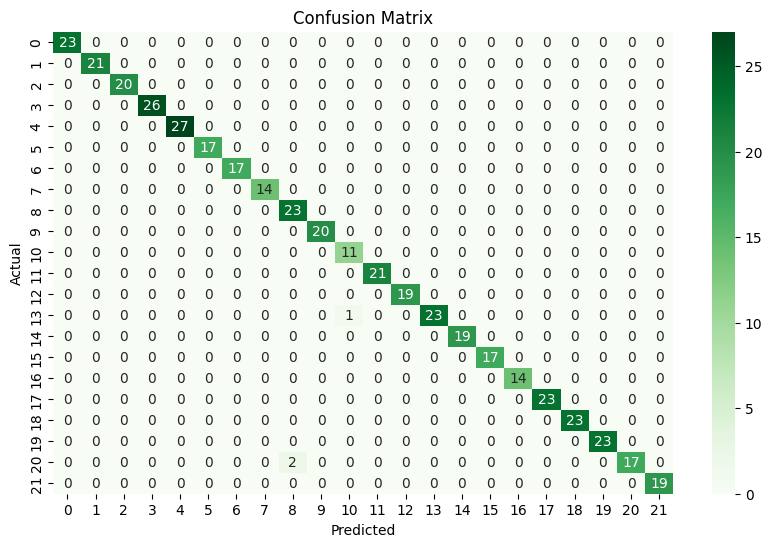

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
sample_data = np.array([[90, 42, 43, 20.87974371, 82.00274423, 6.5, 202.9355362]])
prediction = model.predict(sample_data)
print("Recommended Crop:", prediction[0])

Recommended Crop: rice


In [ ]:
from flask import render_template


print("Enter the following details to get a crop recommendation:")

def safe_input(prompt):
    value = input(prompt)
    return float(value) if value.strip() != "" else 0

N = safe_input("Nitrogen (N): ")
P = safe_input("Phosphorus (P): ")
K = safe_input("Potassium (K): ")
temperature = safe_input("Temperature (°C): ")
humidity = safe_input("Humidity (%): ")
ph = safe_input("pH value: ")
rainfall = safe_input("Rainfall (mm): ")
crop.describe()
# Create a DataFrame for the input values
user_data = pd.DataFrame({
    'N': [N],
    'P': [P],
    'K': [K],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],
    'rainfall': [rainfall]

})

# Make prediction
prediction = model.predict(user_data)

# Show result
print("\n✅ Recommended Crop for given conditions is:", prediction[0])


In [15]:
crop.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117
